In [1]:
"""
this file takes a dataframe and computes cluster map for it

prereq:
pip install scikit-learn nltk matplotlib
"""

from get_data import get_dfs
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

    

nltk.download('stopwords')
nltk.download('punkt_tab')



[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\prpar\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\prpar\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [2]:
# read dfs
df_recall, df_device_event, df_device = get_dfs()

loading table: recall....


C:\Users\prpar\Documents\OMSCS\s25 - cse6242 dva\CSE6242-Group-Project\priya-streamlit-test\get_data.py:34: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(f'select * from {table}', conn)


                                     id cfres_id k_number pma_number  \
0  400cd411-6ba1-4360-9fea-b55e13468d00   212115     None       None   
1  1d35718a-6bc8-4706-bd3d-31741cd98324   212318     None       None   
2  224a2ab8-97ef-4799-879e-6083898ab2e7   211119     None       None   
3  b264b469-7c7f-48d5-bea0-57f38377569a   208478     None       None   
4  0aad8582-1a51-4374-998c-50cc0f4b4466   207500     None       None   

  event_date_initiated event_date_created event_date_posted  \
0           2025-01-15               None        2025-02-05   
1           2025-01-28               None        2025-02-03   
2           2024-08-08               None        2024-12-03   
3           2024-03-28               None        2024-07-01   
4           2024-04-16               None        2024-05-30   

  event_date_terminated     recall_status                   recalling_firm  \
0                  None  Open, Classified        Philips North America Llc   
1                  None  Open, C

C:\Users\prpar\Documents\OMSCS\s25 - cse6242 dva\CSE6242-Group-Project\priya-streamlit-test\get_data.py:34: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(f'select * from {table}', conn)


                               event_id adverse_event_flag  \
0  137fc417-abd2-4c92-af98-f816d9d1b01c                  N   
1  7d7e75df-69d0-4344-a609-d8294fcaf9e1                  N   
2  b112bfb0-4306-498a-8ab9-76076641f4f9                  N   
3  ea373448-a219-4494-9cb6-2b3fbb403c8f                  N   
4  52eeaa61-643d-4452-aaa6-0b831af004c5                  N   

  date_facility_aware date_manufacturer_received date_of_event date_received  \
0                None                 2024-01-22    2024-01-22    2024-02-12   
1                None                 2024-01-18    2024-01-01    2024-02-12   
2                None                 2023-12-22    2023-12-22    2024-01-19   
3                None                 2024-01-24    2024-01-14    2024-02-12   
4          2024-02-19                       None          None    2024-03-15   

  date_report date_report_to_fda date_report_to_manufacturer  \
0  2024-02-12               None                        None   
1  2024-03-13     

C:\Users\prpar\Documents\OMSCS\s25 - cse6242 dva\CSE6242-Group-Project\priya-streamlit-test\get_data.py:34: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(f'select * from {table}', conn)


                               event_id  \
0  137fc417-abd2-4c92-af98-f816d9d1b01c   
1  137fc417-abd2-4c92-af98-f816d9d1b01c   
2  7d7e75df-69d0-4344-a609-d8294fcaf9e1   
3  7d7e75df-69d0-4344-a609-d8294fcaf9e1   
4  b112bfb0-4306-498a-8ab9-76076641f4f9   

                                          brand_name catalog_number  \
0  T:SLIM X2 INSULIN PUMP WITH INTEROPERABLE TECH...        1005011   
1  T:SLIM X2 INSULIN PUMP WITH INTEROPERABLE TECH...        1005011   
2                        CONSTELLATION VISION SYSTEM     8065751150   
3                        CONSTELLATION VISION SYSTEM     8065751150   
4                                       AESPIRE 7100           None   

  date_received date_removed_flag date_returned_to_manufacturer  \
0    2024-02-12              None                          None   
1    2024-02-12              None                          None   
2    2024-02-12              None                          None   
3    2024-02-12              None             

### Analyzing Recall Data


In [3]:
desired_cols = [
    'event_date_initiated',
    # 'event_date_created',
    'event_date_posted',
    # 'event_date_terminated',
    'recalling_firm',
    'city',
    'state',
    'country',
    'product_code',
    'product_quantity',
    'device_name',
    'device_class',
    'medical_specialty_description',
    # 'registration_number',
    'recall_status',
    'reason_for_recall',
    'root_cause_description',
    'action'
]
df_recall = df_recall[desired_cols]
display(df_recall)


,event_date_initiated,event_date_posted,recalling_firm,city,state,country,product_code,product_quantity,device_name,device_class,medical_specialty_description,recall_status,reason_for_recall,root_cause_description,action
0,2025-01-15,2025-02-05,Philips North America Llc,Cambridge,MA,None,MHX,98 units,"Monitor, Physiological, Patient(With Arrhythmi...",2,Cardiovascular,"Open, Classified","Potential failure to alarm for ""No Device Data...",Software design,Philips began notifying consignees on about 01...
1,2025-01-28,2025-02-03,"GE Medical Systems, LLC",Waukesha,WI,None,KPR,3149 (1697 US; 1452 OUS),"System, X-Ray, Stationary",2,Radiology,"Open, Classified",The user can continue to take the next exposur...,Radiation Control for Health and Safety Act,"Firm sent an ""IMPORTANT ELECTRONIC PRODUCT RAD..."
2,2024-08-08,2024-12-03,Epilog Laser Corp.,Golden,CO,None,RHK,751,"Laser Marker Or Engraver, Industrial Or Commer...",N,Unknown,"Open, Classified",a. A small number of Fusion Pro 24 units were ...,Radiation Control for Health and Safety Act,The measures to be taken to repair such defect...
3,2024-03-28,2024-07-01,Horiba Instruments Incorporated,Piscataway,NJ,None,REM,4 units,Spectroscopy Instrument,N,Unknown,"Open, Classified",HORIBA custom configured fluorescence instrume...,Radiation Control for Health and Safety Act,Horiba plans to issue an IMPORTANT ELECTRONIC ...
4,2024-04-16,2024-05-30,"Reflexion Medical, Inc.",Hayward,CA,None,QVA,7 systems,Fludeoxyglucose F18-Guided Radiation Therapy S...,2,Radiology,"Open, Classified",A potential dose error exists for patients tre...,Software design,"On 04/29/2024, the firm sent an ""Urgent: Medic..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54515,2024-11-14,2024-12-16,"Kirwan Surgical Products, LLC",Marshfield,MA,None,GEI,"80,060 units","Electrosurgical, Cutting & Coagulation & Acces...",2,"General, Plastic Surgery","Open, Classified",Potential for the outer stainless-steel tube t...,Device Design,Kirwan Surgical Products notified customers on...
54516,2024-11-01,2024-12-23,"Becton, Dickinson and Company, BD Bio Sciences",Milpitas,CA,None,OYE,15 power supplies,Flow Cytometric Reagents And Accessories.,2,Hematology,"Open, Classified","On October 18, 2024, BD has identified through...",Nonconforming Material/Component,"On Nov 18, 2024, BD has identified through com..."
54517,2024-11-01,2024-12-23,"Becton, Dickinson and Company, BD Bio Sciences",Milpitas,CA,None,OYE,16 power supplies,Flow Cytometric Reagents And Accessories.,2,Hematology,"Open, Classified","On October 18, 2024, BD has identified through...",Nonconforming Material/Component,"On Nov 18, 2024, BD has identified through com..."
54518,2024-11-25,2024-12-27,"Angiodynamics, Inc.",Queensbury,NY,None,MCW,138 units,"Catheter, Peripheral, Atherectomy",2,Cardiovascular,"Open, Classified",Potential for procedural delays or interruptio...,Under Investigation by firm,AngioDynamics notified consignees on about 11/...


In [4]:
"""
clean up df:
- parse numbers from product_quantity
- preprocesss device_name, reason_for_recall, action(?), recalling_firm
- transform categorical cols of interest into numerical
"""
def extract_numbers(df, col):
    # use regex to extract numbers from cols
    df[col] = df[col].str.replace(',', '')
    return df[col].str.extract('(\d+)').astype(int, errors='ignore')

def preprocess_text(text):
    # tokenize and remove stopwords
    if text is None or len(text) == 0:
        return ''
    text = text.lower()
    ### THIS COULD BE THE PROBLEM ###
    words = word_tokenize(text)
    stopwords_list = set(stopwords.words('english'))
    words = [w for w in words if w not in stopwords_list and w.isalnum()]
    return ' '.join(words)
    ###############################
    
def get_tfidf(df, col):
    # create new col of td-idf values
    df[col] = df[col].apply(preprocess_text)
    vectorizer = TfidfVectorizer()
    tfidf = vectorizer.fit_transform(df[col])
    df[f'tfidf_{col}'] = list(tfidf.toarray())
    
    print(f'----- completed tfidf calc for {col}-----')
    return df


In [5]:
# apply preprocessing and tfidf to desired cols
df_recall_prep = get_tfidf(df_recall, 'device_name')
df_recall_prep = get_tfidf(df_recall, 'reason_for_recall')
df_recall_prep = get_tfidf(df_recall, 'action')
df_recall_prep = get_tfidf(df_recall, 'recalling_firm')

# replace product_quantity with numbers only
df_recall['num_product_quantity'] = extract_numbers(df_recall, 'product_quantity')

# typically 4m

----- completed tfidf calc for device_name-----
----- completed tfidf calc for reason_for_recall-----
----- completed tfidf calc for action-----
----- completed tfidf calc for recalling_firm-----


In [6]:
# categorical transformation
categorical = [
    'device_class',
    'medical_specialty_description',
    'recall_status',
    'root_cause_description'
]

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in categorical:
    df_recall[f'num_{col}'] = le.fit_transform(df_recall[col])


In [7]:
# display(df_recall)
df_recall_input = df_recall[[col for col in df_recall.columns if 'tfidf' in col or 'num_' in col]]
display(df_recall_input)

,tfidf_device_name,tfidf_reason_for_recall,tfidf_action,tfidf_recalling_firm,num_product_quantity,num_device_class,num_medical_specialty_description,num_recall_status,num_root_cause_description
0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",98,1,1,1,35
1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",3149,1,19,1,29
2,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",751,3,20,1,29
3,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",4,3,20,1,29
4,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",7,1,19,1,35
...,...,...,...,...,...,...,...,...,...
54515,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",80060,1,8,1,3
54516,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",15,1,9,1,18
54517,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",16,1,9,1,18
54518,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",138,1,1,1,39


In [14]:
# attempt k-means

def k_means(df, desired_col, k=10, random_state=52):
    # drop na
    df.dropna(inplace=True)

    # get numerical cols
    X_num =  df[[c for c in df.columns if 'num_' in c]].values.astype('float')

    # h-stack the tfidf col
    X_tfidf = np.stack(df[desired_col].values)
    X = np.hstack((X_num, X_tfidf))

    # # standardize
    # scaler = StandardScaler()
    # X_scaled = scaler.fit_transform(X)
    
    # kmeans
    kmeans = KMeans(n_clusters=k, random_state=random_state)
    clusters = kmeans.fit_predict(X)

    # append cluster label to df
    clustered_df = df.copy()
    clustered_df[f'cluster_{desired_col}'] = clusters
    
    return X, kmeans, clustered_df


In [9]:
X, kmeans, cluster_df = k_means(df_recall_input,'tfidf_recalling_firm')

C:\Users\prpar\AppData\Local\Temp\ipykernel_20968\2578857490.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


In [10]:
cluster_df['cluster'].value_counts()

cluster
0    50048
8      402
6       78
9       26
2       15
3        5
5        5
7        1
4        1
1        1
Name: count, dtype: int64

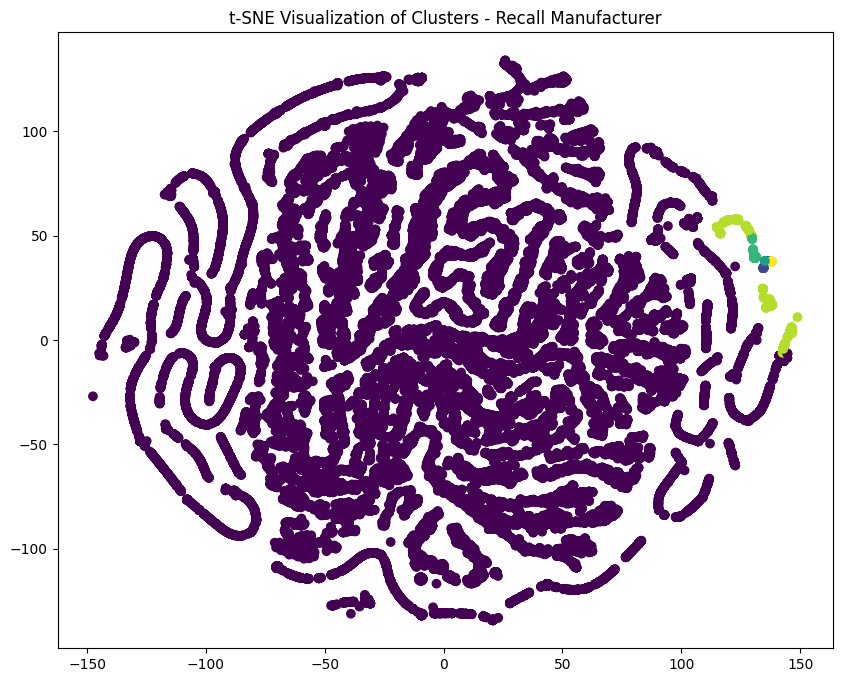

In [12]:
labels = kmeans.labels_

# apply t-SNE for dimensionality reduction
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)

# plot clusters
plt.figure(figsize=(10, 8))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=labels, cmap='viridis', marker='o')
plt.title('t-SNE Visualization of Clusters - Recall Manufacturer')
plt.show()

In [13]:
# above code is sourced from - https://medium.com/@RobuRishabh/clustering-text-data-with-k-means-and-visualizing-with-t-sne-9bc1fe7d8fed#:~:text=The%20goal%20of%20K%2DMeans,group%20similar%20documents%20into%20clusters.&text=We%20set%20the%20number%20of,is%20assigned%20a%20cluster%20label.
## RUNTIME WAS ABOUT 20-30 MINS FOR THE PLOT..

In [16]:
# ## repeat for device name
X, kmeans, cluster_df = k_means(df_recall_input,'tfidf_device_name')
cluster_df['cluster_tfidf_device_name'].value_counts()

cluster_tfidf_device_name
0    50048
8      402
6       78
9       26
2       15
3        5
5        5
7        1
4        1
1        1
Name: count, dtype: int64